# Railrocket EDA and data preparation

### Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import os


### Read in the Path

In [2]:
category = "/Users/belladu/Downloads/Retailrocket recommender system dataset/category_tree.csv"
events = "/Users/belladu/Downloads/Retailrocket recommender system dataset/events.csv"
item_properties = "//Users/belladu/Downloads/Retailrocket recommender system dataset/item_properties_part1.csv"
item_properties_part2 = "/Users/belladu/Downloads/Retailrocket recommender system dataset/item_properties_part2.csv"


In [3]:
df_category = pd.read_csv(category)
df_events = pd.read_csv(events)
df_item_properties = pd.read_csv(item_properties)
df_item_properties_part2 = pd.read_csv(item_properties_part2)


In [4]:
df_category.head()


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [5]:
df_events.head()


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [6]:
df_item_properties.head()


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [7]:
df_item_properties_part2.head()


,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


In [8]:
# get shape of each dataframe
print(df_category.shape)
print(df_events.shape)
print(df_item_properties.shape)
print(df_item_properties_part2.shape)


(1669, 2)
(2756101, 5)
(10999999, 4)
(9275903, 4)


In [9]:
# check the null values in each dataframe
print(df_category.isnull().sum())
print(df_events.isnull().sum())
print(df_item_properties.isnull().sum())
print(df_item_properties_part2.isnull().sum())


categoryid     0
parentid      25
dtype: int64
timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64
timestamp    0
itemid       0
property     0
value        0
dtype: int64
timestamp    0
itemid       0
property     0
value        0
dtype: int64


In [10]:
len(df_category.categoryid.unique())


1669

In [11]:
len(df_category.parentid.unique())


363

### Category Data

There are 2 columns in this dataset:
1. categoryid
2. parentid: if null, then it does not exist

In [12]:
df_category.columns

Index(['categoryid', 'parentid'], dtype='object')

In [13]:
# get the values counts of each column
print(df_category.categoryid.value_counts())
print(df_category.parentid.value_counts())

1016    1
1649    1
432     1
557     1
1568    1
       ..
1       1
1480    1
277     1
1398    1
761     1
Name: categoryid, Length: 1669, dtype: int64
250.0     31
362.0     22
1009.0    22
351.0     19
1259.0    18
          ..
95.0       1
323.0      1
747.0      1
183.0      1
209.0      1
Name: parentid, Length: 362, dtype: int64


In [14]:
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.hist(df_category['categoryid'], bins=50, color='skyblue')

# # Add labels and title
# ax.set_xlabel('Category ID')
# ax.set_ylabel('Count')
# ax.set_title('Distribution of Category IDs')

# # Show the plot
# plt.show()

> Upon examining the `df_category` DataFrame, it appears that creating insightful visualizations may not be possible without additional information. The `categoryid` column contains unique identifiers for each category, but without a clear understanding of the meaning behind these IDs, it may be difficult to draw meaningful conclusions. On the other hand, the  `parentid` column provides an identifier for the parent category. If a parent category exists, the parentid column will contain the corresponding identifier, otherwise it will be empty [1].

### Event Data

Text(0.5, 1.0, 'Event Frequency Distribution')

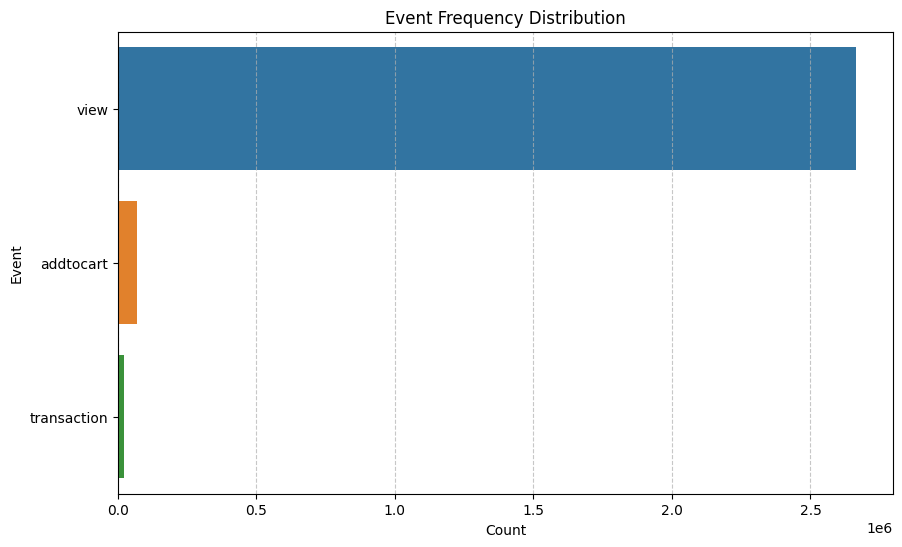

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df_events['event'].value_counts().values,
            y=df_events['event'].value_counts().index, ax=ax)

# Add grid lines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Set axis labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Event')
ax.set_title('Event Frequency Distribution')


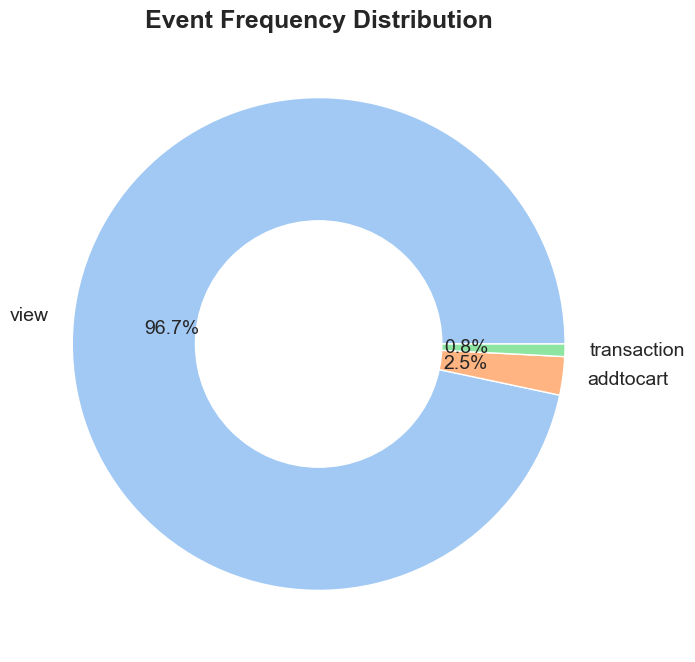

In [16]:
# Calculate the event counts
event_counts = df_events['event'].value_counts()

# Set custom colors
colors = sns.color_palette('pastel')[0:len(event_counts)]

# Set custom style
sns.set_style('white')

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(event_counts.values, labels=event_counts.index,
       autopct='%1.1f%%', colors=colors, textprops={'fontsize': 14})

# Add a circle in the middle to make a donut chart
circle = plt.Circle((0, 0), 0.5, color='white')
ax.add_artist(circle)

# Set title
ax.set_title('Event Frequency Distribution', fontsize=18, fontweight='bold')

# Remove borders from the plot
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


> Conducting an exploratory analysis of customer behavior is imperative to gain insights. One such analysis is the examination of how frequently customers view products, add items to their carts, and complete transactions.

> The results of the this EDA above in pie chart indicate that a large majority of customers, specifically 96.7%, viewed products on the online store, demonstrating a considerable level of engagement with the platform. However, the analysis also revealed a significant drop-off in the number of customers adding items to their carts, with only 2.5% doing so.

> Furthermore, the data shows that only 0.8% of customers completed a transaction, highlighting a low purchase rate. These findings emphasize the importance of identifying and addressing the underlying reasons for the low purchase rate to optimize the benefits of the store. Therefore, further investigation and analysis are recommended to develop a comprehensive understanding of the issues at hand and to implement potential solutions to improve customer engagement and purchase rates.

### Check Seasonal Effects and Trends

In [17]:
df_events['timestamp'] = pd.to_datetime(df_events['timestamp'], unit='ms')
df_events['YEAR'] = pd.DatetimeIndex(df_events['timestamp']).year
df_events['MONTH'] = pd.DatetimeIndex(df_events['timestamp']).month
df_events['DAY'] = pd.DatetimeIndex(df_events['timestamp']).day
df_events['Date'] = pd.DatetimeIndex(df_events['timestamp']).date


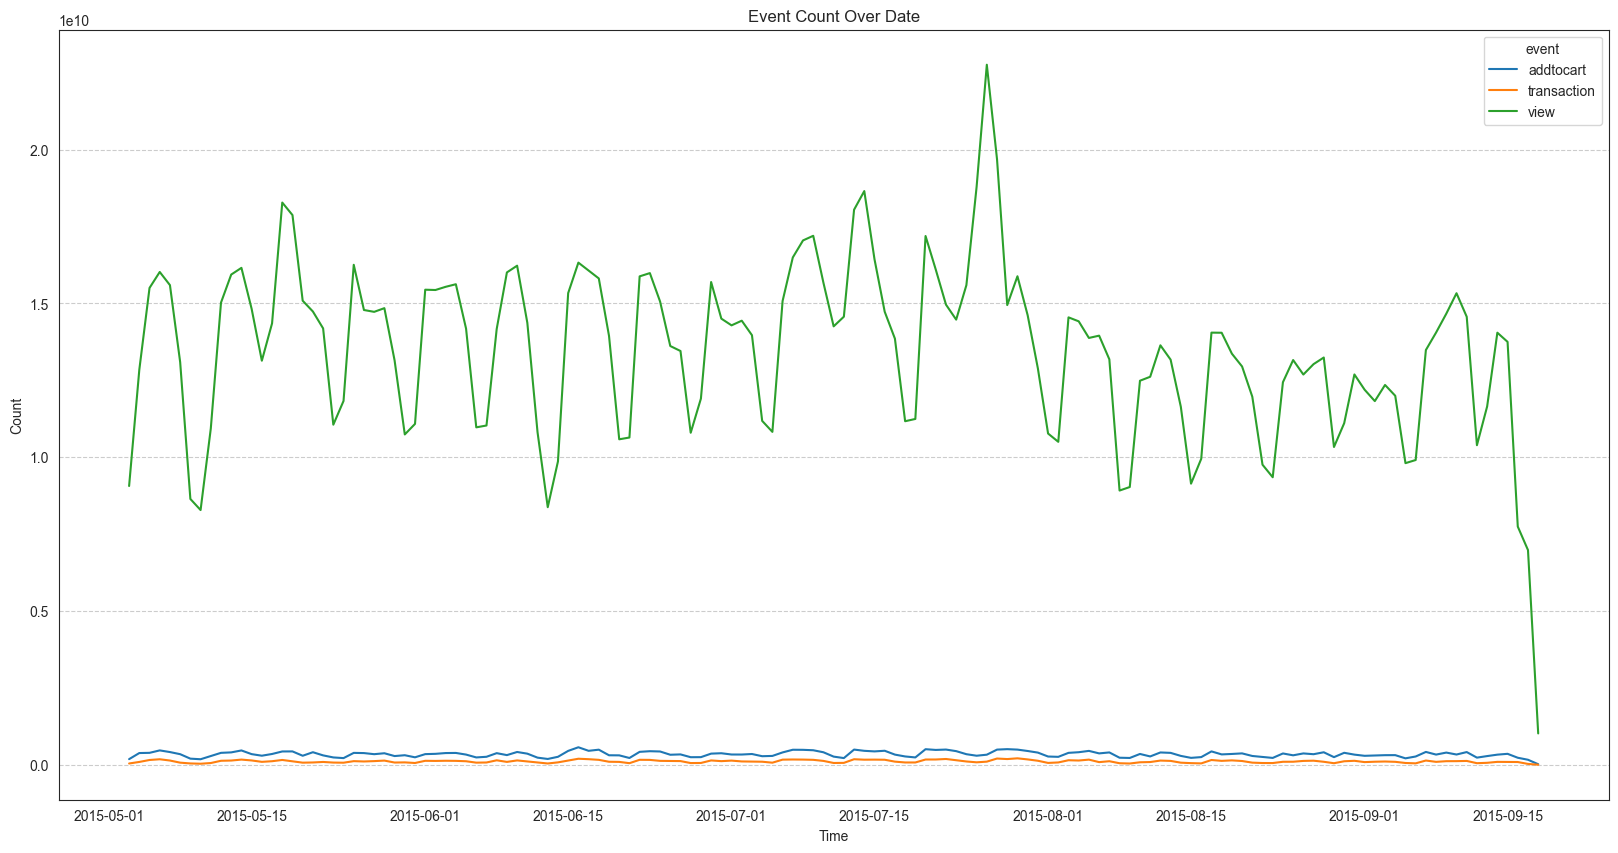

In [18]:
event_count = df_events.groupby(['Date', 'event']).sum().reset_index()

# Create a line chart using Seaborn
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='Date', y='visitorid', hue='event', data=event_count, ax=ax)

# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Count')
ax.set_title('Event Count Over Date')
# Add grid lines
ax.grid(axis='y', linestyle='--')

# Show the plot
plt.show()


> Based on the time trend plot, it is clear that there are some significant differences in the level of customer activity across time. Specifically, we observe that the frequency of product views appears to peak around 2015/08/01, indicating a period of heightened engagement, probably due to unknown seasonal effect. Conversely, we note a sharp decline in product views around 2015/09/15, suggesting a decrease in customer engagement along with some drop in activities such as adding to cart and transation. Interestingly, there appears to be less variation in the frequency of add-to-cart and transaction activities over time. These insights may be valuable in understanding the factors that influence customer engagement and might inform strategies to drive increased customer activity and revenue.

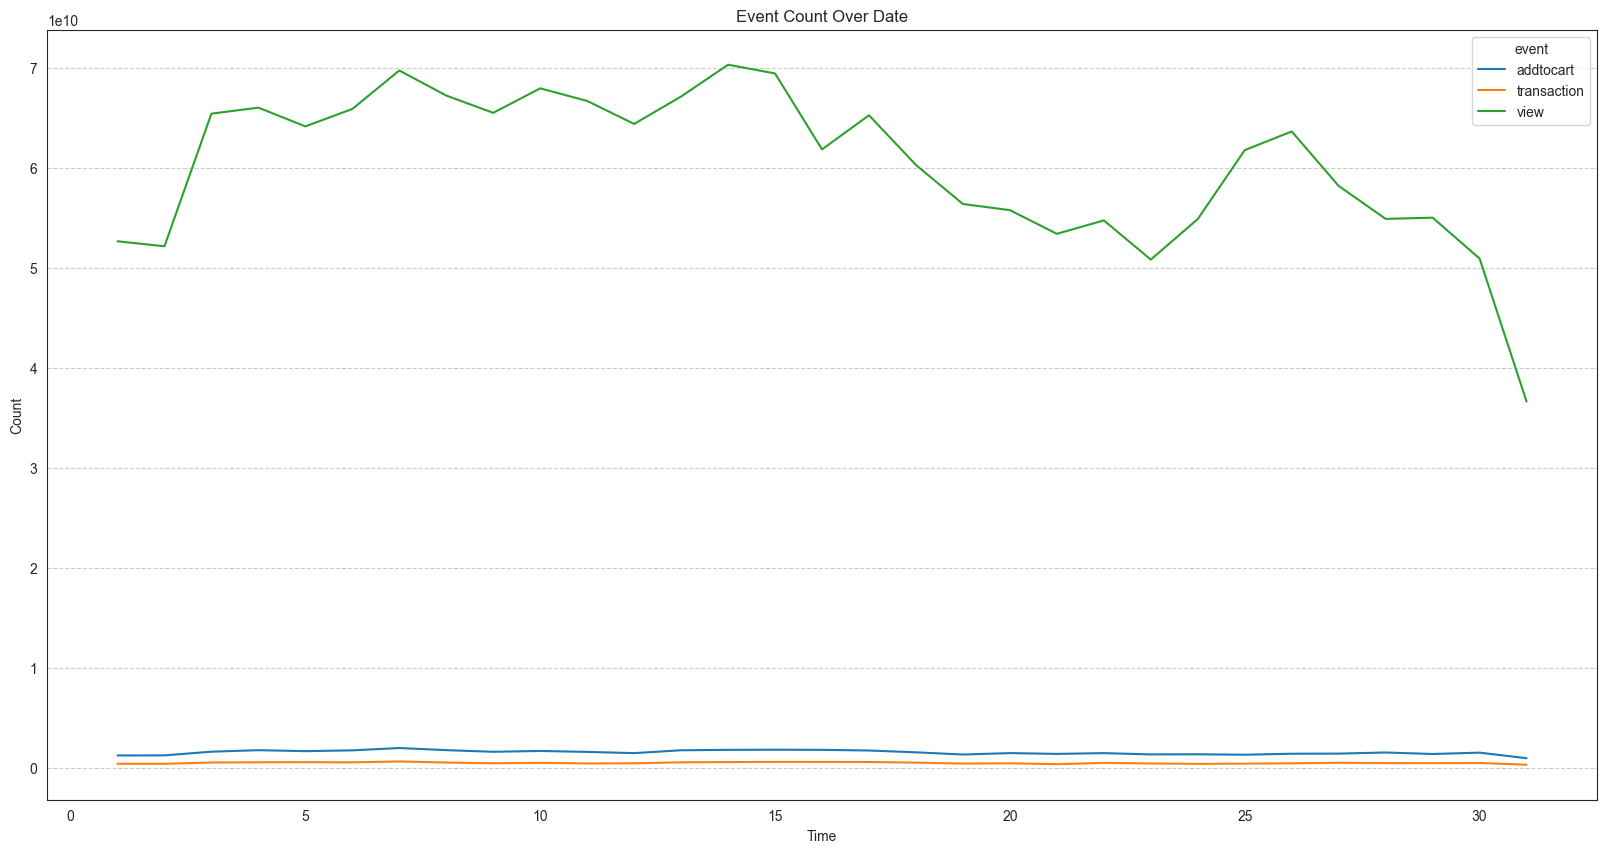

In [19]:
event_count = df_events.groupby(['DAY', 'event']).sum().reset_index()

# Create a line chart using Seaborn
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='DAY', y='visitorid', hue='event', data=event_count, ax=ax)

# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Count')
ax.set_title('Event Count Over Date')
# Add grid lines
ax.grid(axis='y', linestyle='--')

# Show the plot
plt.show()


> After examining the time trend plot, it is clear that there are some noticeable patterns in customer activity across different days of the month. We observe that there is a  drop in activity towards the end of each month, which could be due to a variety of reasons. One possibility is that not every month has 31 days, so the final day of the month may see less activity due to it being shorter. Alternatively, it could be that customers are simply more budget-conscious towards the end of the month and may be less likely to engage in online shopping activities. Specifically, we see that the trend line for all activities, including view, add-to-cart, and transaction, is slightly decreasing over time in the end of the month.

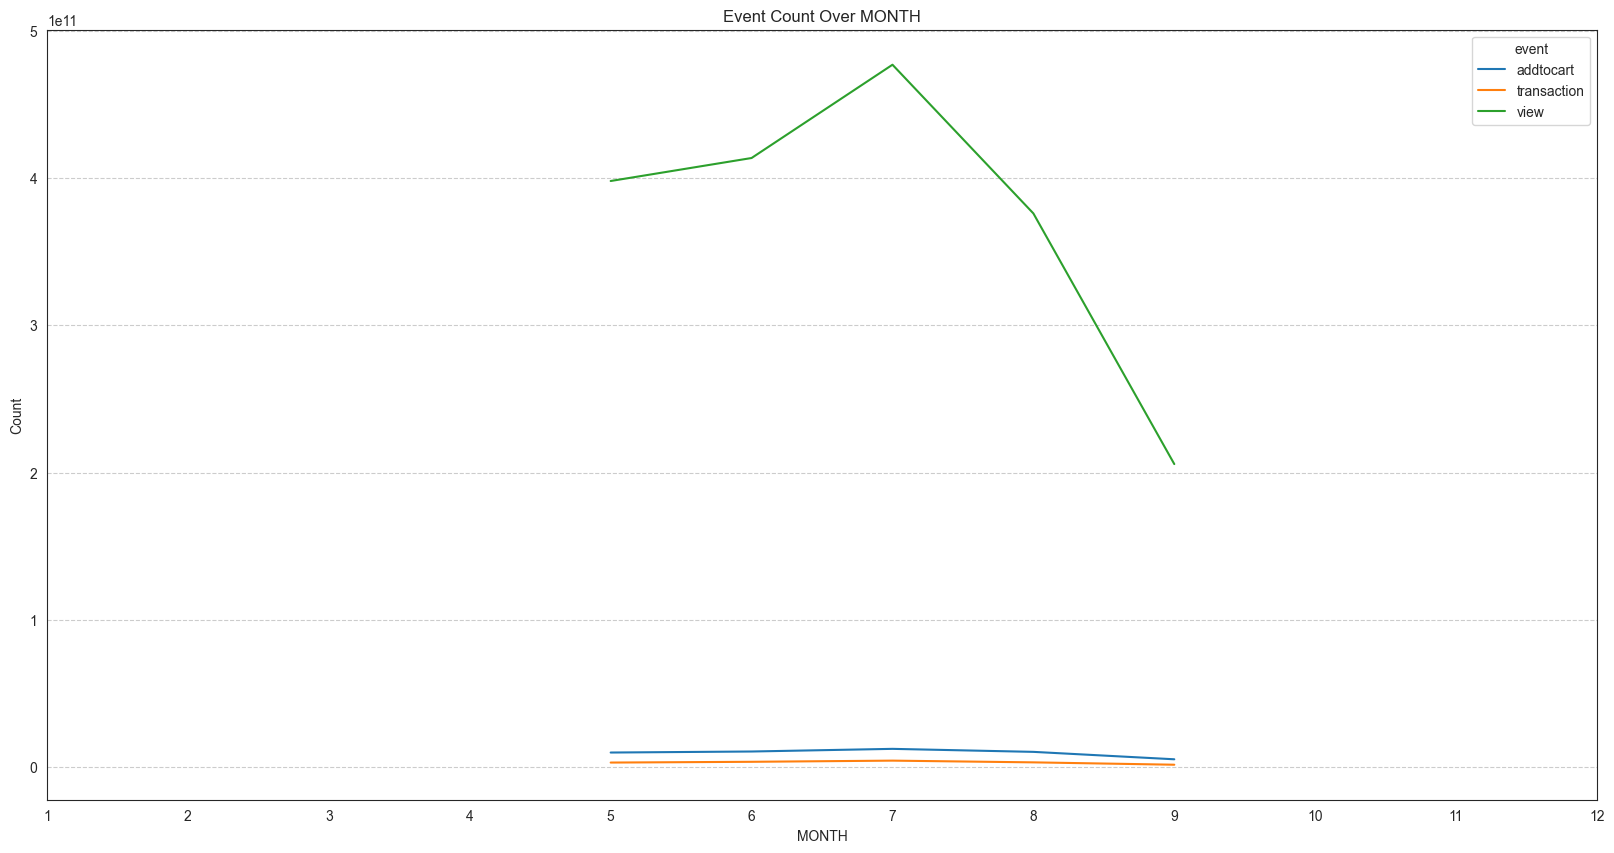

In [20]:
event_count = df_events.groupby(['MONTH', 'event']).sum().reset_index()

# Create a line chart using Seaborn
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='MONTH', y='visitorid', hue='event', data=event_count, ax=ax)

# make the x-axis labels to be integers
ax.set_xticks(np.arange(1, 13, 1))

# Add labels and title
ax.set_xlabel('MONTH')
ax.set_ylabel('Count')
ax.set_title('Event Count Over MONTH')
# Add grid lines
ax.grid(axis='y', linestyle='--')

# Show the plot
plt.show()


In [21]:
df_events['MONTH'].unique()


array([6, 7, 8, 9, 5])

> Upon analyzing the month trend plot above, we notice an interesting observation regarding the months in which customer activity was recorded. Specifically, it appears that activity was only recorded during the months of May through September, and was absent for the remaining months of the year. This trend may suggest that the online store was either not operating during these months, or that customer activity during these months was not being tracked.

> Furthermore, we observe a decreasing trend in customer activity after July, with the sharpest drop in the frequency of product views. This pattern may indicate a decline in customer interest or engagement with the online store over time.

### Item Property Datasets

In [22]:
df_item_properties['timestamp'] = pd.to_datetime(
    df_item_properties['timestamp'], unit='ms')
df_item_properties['YEAR'] = pd.DatetimeIndex(
    df_item_properties['timestamp']).year
# df_item_properties['MONTH'] = pd.DatetimeIndex(
#     df_item_properties['timestamp']).month
# df_item_properties['DAY'] = pd.DatetimeIndex(
#     df_item_properties['timestamp']).day
df_item_properties['Date'] = pd.DatetimeIndex(
    df_item_properties['timestamp']).date


In [23]:
df_item_properties_part2['timestamp'] = pd.to_datetime(
    df_item_properties_part2['timestamp'], unit='ms')
df_item_properties_part2['YEAR'] = pd.DatetimeIndex(
    df_item_properties_part2['timestamp']).year
df_item_properties_part2['Date'] = pd.DatetimeIndex(
    df_item_properties_part2['timestamp']).date

In [24]:
df_item_properties.head()

,timestamp,itemid,property,value,YEAR,Date
0,2015-06-28 03:00:00,460429,categoryid,1338,2015,2015-06-28
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200,2015,2015-09-06
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566,2015,2015-08-09
3,2015-05-10 03:00:00,59481,790,n15360.000,2015,2015-05-10
4,2015-05-17 03:00:00,156781,917,828513,2015,2015-05-17


### Concat two datasets

In [28]:
df_item_properties_total = pd.concat(
    [df_item_properties, df_item_properties_part2], axis=0)

df_item_properties_total.head()

,timestamp,itemid,property,value,YEAR,Date
0,2015-06-28 03:00:00,460429,categoryid,1338,2015,2015-06-28
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200,2015,2015-09-06
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566,2015,2015-08-09
3,2015-05-10 03:00:00,59481,790,n15360.000,2015,2015-05-10
4,2015-05-17 03:00:00,156781,917,828513,2015,2015-05-17


In [30]:
df_item_properties_total.shape
assert len(df_item_properties_total) == len(df_item_properties) + len(df_item_properties_part2)

In [33]:
df_item_properties_total['property'].unique()

array(['categoryid', '888', '400', ..., '1091', '522', '769'],
      dtype=object)

In [35]:
df_item_properties_total['value'].unique()

array(['1338', '1116713 960601 n277.200',
       'n552.000 639502 n720.000 424566', ..., '1165718',
       '598729 511183 981281 829153 631983', 'n1020780.000'], dtype=object)

#### Dealing with the `value` column

In [36]:
# Convert all values to string data type
df_item_properties_total['value'] = df_item_properties_total['value'].astype(str)

# Remove all non-numeric characters from each value using a regular expression
df_item_properties_total['value'] = df_item_properties_total['value'].str.replace('[^0-9]+', '', regex=True)

# Replace all empty strings with NaN values
df_item_properties_total['value'] = df_item_properties_total['value'].replace('', np.nan)

# Convert the column to numeric data type
df_item_properties_total['value'] = pd.to_numeric(df_item_properties_total['value'], errors='coerce')

In [38]:
df_item_properties_total

,timestamp,itemid,property,value,YEAR,Date
0,2015-06-28 03:00:00,460429,categoryid,1.338000e+03,2015,2015-06-28
1,2015-09-06 03:00:00,206783,888,1.116714e+18,2015,2015-09-06
2,2015-08-09 03:00:00,395014,400,5.520006e+23,2015,2015-08-09
3,2015-05-10 03:00:00,59481,790,1.536000e+07,2015,2015-05-10
4,2015-05-17 03:00:00,156781,917,8.285130e+05,2015,2015-05-17
...,...,...,...,...,...,...
9275898,2015-06-07 03:00:00,236931,929,1.200000e+04,2015,2015-06-07
9275899,2015-08-30 03:00:00,455746,6,1.501696e+11,2015,2015-08-30
9275900,2015-08-16 03:00:00,347565,686,6.108340e+05,2015,2015-08-16
9275901,2015-06-07 03:00:00,287231,867,7.690620e+05,2015,2015-06-07


In [39]:
df_item_properties_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20275902 entries, 0 to 9275902
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   itemid     int64         
 2   property   object        
 3   value      float64       
 4   YEAR       int64         
 5   Date       object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.1+ GB


In [54]:
df_item_properties_total_sample = df_item_properties_total.sample(100)
df_item_properties_total_sample

,timestamp,itemid,property,value,YEAR,Date
2236567,2015-09-13 03:00:00,383947,888,1.501692e+41,2015,2015-09-13
6220421,2015-08-09 03:00:00,239672,888,2.023460e+05,2015,2015-08-09
2805178,2015-08-16 03:00:00,211214,33,1.305836e+06,2015,2015-08-16
1046447,2015-08-30 03:00:00,16079,400,1.297730e+31,2015,2015-08-30
8177913,2015-07-05 03:00:00,315974,888,1.333207e+12,2015,2015-07-05
...,...,...,...,...,...,...
8754004,2015-05-10 03:00:00,4856,112,6.796770e+05,2015,2015-05-10
3848030,2015-05-24 03:00:00,436406,790,3.240000e+06,2015,2015-05-24
6387728,2015-05-10 03:00:00,167132,52,1.310600e+19,2015,2015-05-10
1986362,2015-07-19 03:00:00,4545,categoryid,2.560000e+02,2015,2015-07-19


In [59]:
df_item_properties_total.YEAR.unique()

array([2015])

In [60]:
df_item_properties_total_sample.groupby(['YEAR']).sum()

,itemid,value
YEAR,,
2015,24380086,1.249028e+228


In [62]:
df_item_properties_total_sample.groupby(['property']).count()


,timestamp,itemid,value,YEAR,Date
property,,,,,
1044,1,1,1,1,1
1066,1,1,1,1,1
1068,1,1,1,1,1
112,3,3,3,3,3
122,1,1,1,1,1
159,1,1,1,1,1
202,5,5,5,5,5
227,1,1,1,1,1
243,1,1,1,1,1


<AxesSubplot:xlabel='property'>

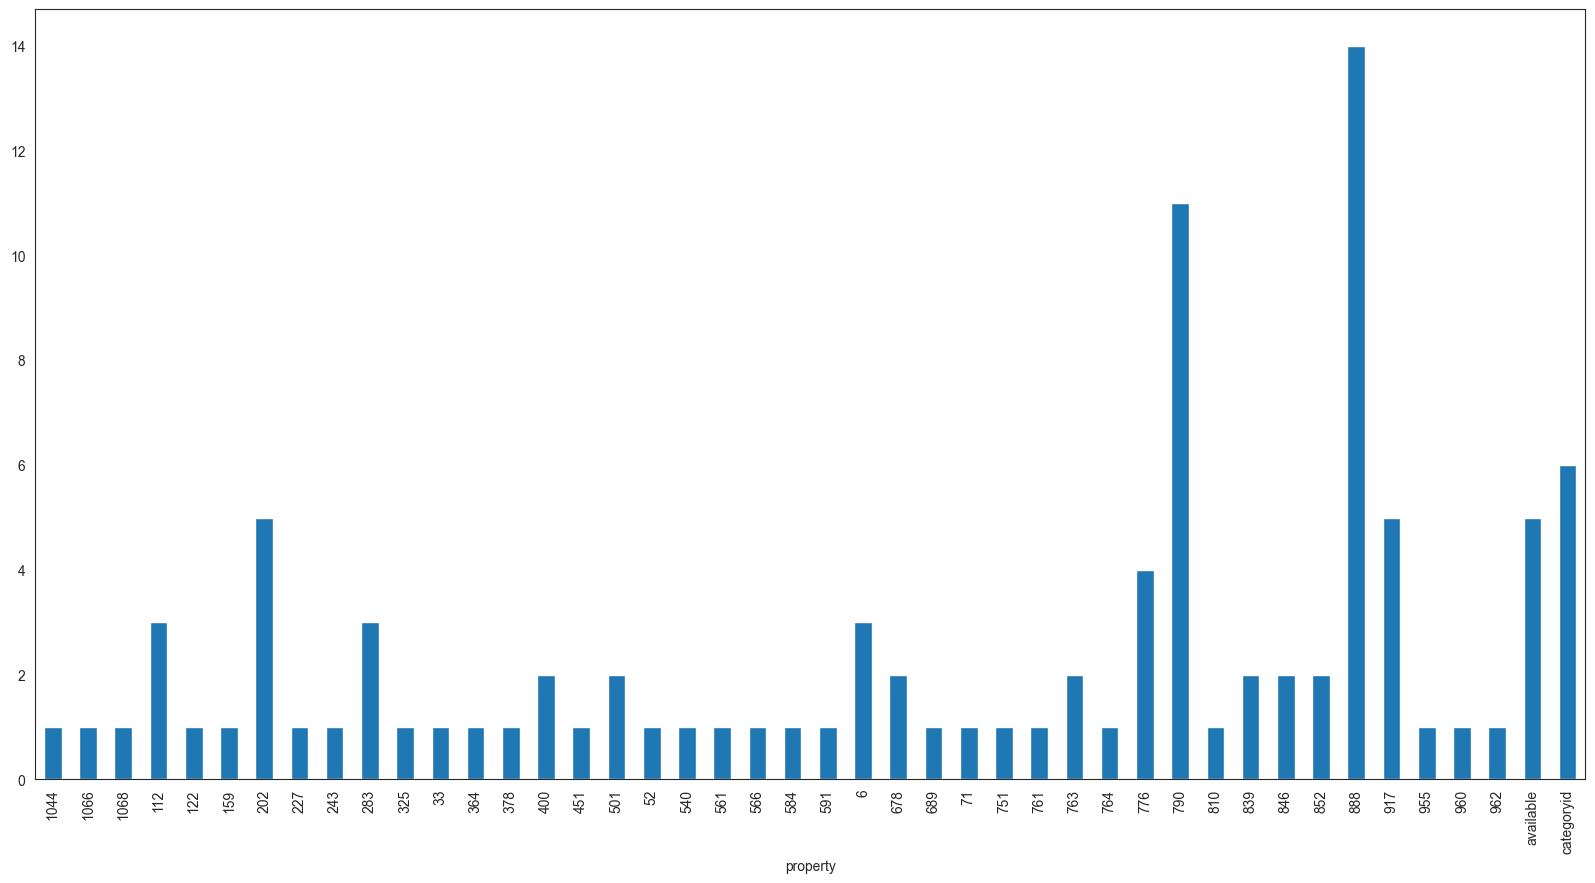

In [63]:
df_item_properties_total_sample.groupby(['property']).count()['value'].plot(kind='bar', figsize=(20, 10))

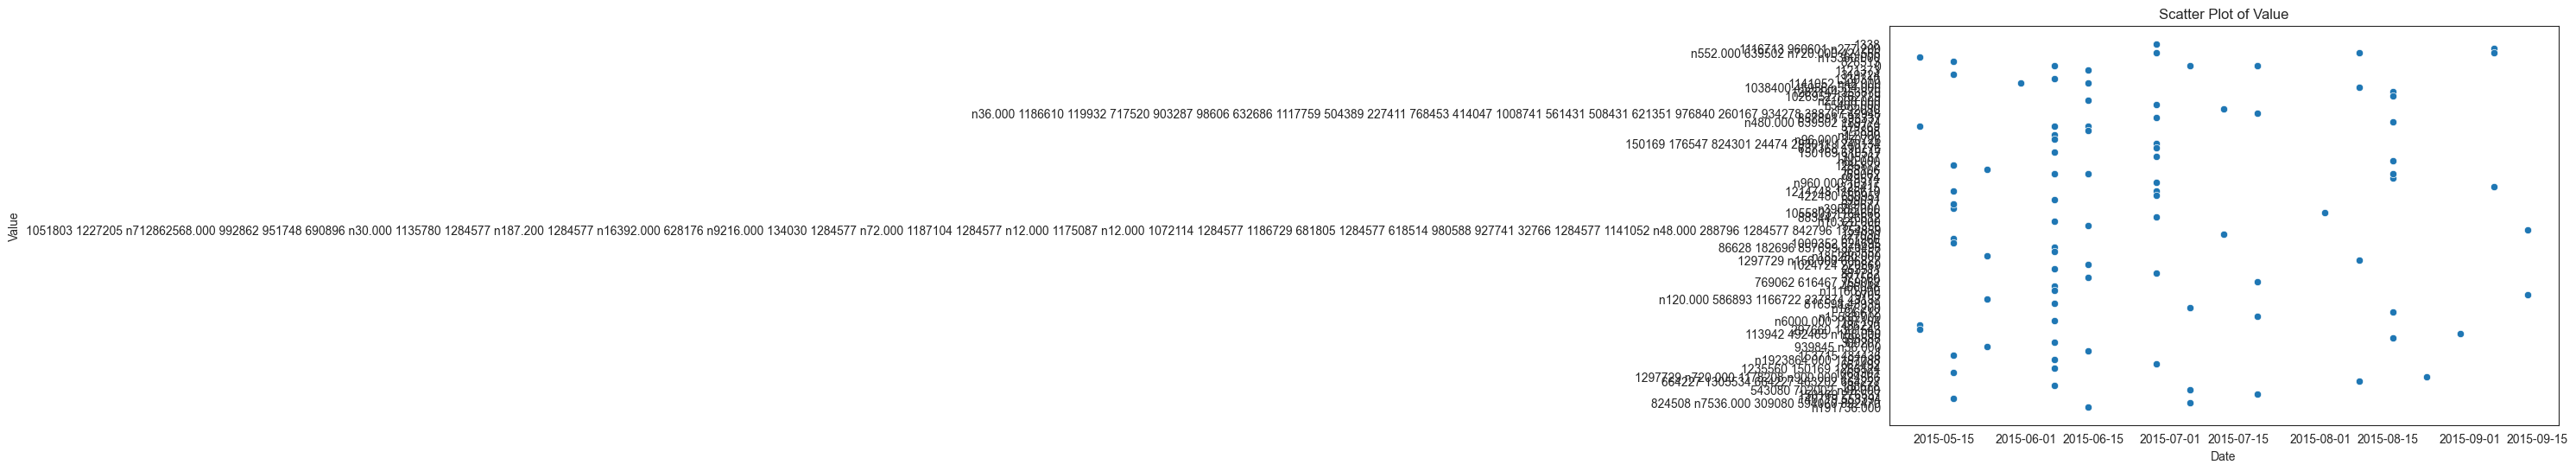

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='Date', y='value', data=df_item_properties_total[:100], ax=ax)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Scatter Plot of Value')

# Show the plot
plt.show()

# References

1. https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset (Dataset)